
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [490]:
import pandas as pd
import sklearn
from datetime import datetime
liquor = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
## Load the data into a DataFrame
# pd.read_csv()
liquor
## Transform the dates if needed, e.g.
# 
liquor["Date"] = pd.to_datetime(liquor["Date"], format="%m/%d/%Y")
liquor_2015 = liquor[(liquor['Date'] >= '2015-01-01') & (liquor['Date'] < '2016-01-01')]
liquor_2016 = liquor[(liquor['Date'] >= '2016-01-01') & (liquor['Date'] < '2017-01-01')]
# If the column is not the index you have two choices:
liquor_2016.head()
# Make it the index (either temporarily or permanently if it's time-series data)
# df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.0,0.79
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,Kinky Liqueur,750,$10.00,$15.00,12,$180.00,9.0,2.38


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [491]:
#calculate yearly liquor sales for each store
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
liquor_2015.County.dropna(inplace=True)
liquor_2015.isnull().sum() #1077 null values in counties 



Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            117
County                   117
Category                  67
Category Name            129
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [495]:
liquor_2015.shape  #over 218,000 rows of liquor sales data 

(218594, 18)

In [496]:
liquor_2015.columns #print columns #can't call variables with spaces in their names

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [497]:
names = ['Date', 'Store_Number', 'City', 'Zip_Code', 'County_Number',
       'County', 'Category', 'Category_Name', 'Vendor_Number',
       'Item_Number', 'Item_Description', 'Bottle_Volume_ml',
       'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold',
       'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']

In [498]:
liquor_2015.columns = names
liquor_2016.columns = names

In [499]:
liquor_2015.columns #renamed columns to eliminate spaces

Index([u'Date', u'Store_Number', u'City', u'Zip_Code', u'County_Number',
       u'County', u'Category', u'Category_Name', u'Vendor_Number',
       u'Item_Number', u'Item_Description', u'Bottle_Volume_ml',
       u'State_Bottle_Cost', u'State_Bottle_Retail', u'Bottles_Sold',
       u'Sale_Dollars', u'Volume_Sold_Liters', u'Volume_Sold_Gallons'],
      dtype='object')

In [500]:
Q1stores_by_county = liquor_2015Q1.groupby("County").Store_Number.count() #for analysis step

In [501]:
Q1sales_by_county = liquor_2015Q1.groupby("County").Bottles_Sold.sum() #I divided stores and sales by county up

In [502]:
Q2stores_by_county = liquor_2015Q2.groupby("County").Store_Number.count() #for every quarter

In [503]:
Q2sales_by_county = liquor_2015Q2.groupby("County").Bottles_Sold.sum()

In [504]:
Q3stores_by_county = liquor_2015Q3.groupby("County").Store_Number.count()

In [505]:
Q3sales_by_county = liquor_2015Q3.groupby("County").Bottles_Sold.sum()

In [506]:
Q4stores_by_county = liquor_2015Q4.groupby("County").Store_Number.count()

In [507]:
Q4sales_by_county = liquor_2015Q4.groupby("County").Bottles_Sold.sum()

In [508]:
stores_by_county_2016 = liquor_2016.groupby("County").Store_Number.count() #and for 2016

In [509]:
bottles_by_county_2016 = liquor_2016.groupby("County").Bottles_Sold.sum()

In [510]:
store_sales_15 = liquor_2015.groupby("Store_Number").sum().Bottles_Sold #sum of bottles sold by store (part of EDA)


In [511]:
store_sales_15

Store_Number
2106    10367
2113      671
2130     7430
2152      573
2178     1928
2190    11111
2191     7696
2200     1668
2205     1882
2228     1312
2233     2253
2238      788
2248     3401
2285     4552
2290     4053
2327      754
2353     3771
2367      392
2413     6298
2445      574
2448     1257
2459      654
2460     2549
2465     1934
2475      719
2478     1110
2487     2259
2498      251
2500    10676
2501    10924
2502    10249
2505     5221
2506     9472
2507     3031
2508     7880
2509     4103
2512    27692
2513     4812
2514     1275
2515     8062
2517     5549
2518     2740
2521     7944
2522     7582
2523     3007
2524     7395
2527     4696
2528     9994
2529     3151
2532     4666
2535     4678
2536     4933
2538     3958
2539     4202
2543     4620
2544     7894
2545     3402
2548     7391
2549     5449
2550     1508
2551     2538
2552     8858
2553     1980
2554     2326
2555     6353
2556     2919
2558     5685
2559      910
2560     7623
2561    10188
2562   

In [512]:
liquor_2015[liquor_2015.Store_Number == 5215] #confirming that store 5215 sold 3 bottles. #still part of EDA

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
145064,2015-12-30,5215,LE CLAIRE,52753,82.0,Scott,1012100.0,CANADIAN WHISKIES,260,10807,Crown Royal Regal Apple,750,$15.00,$22.50,2,$45.00,1.5,0.40
254763,2015-12-30,5215,LE CLAIRE,52753,82.0,Scott,1012100.0,CANADIAN WHISKIES,260,11290,Crown Royal Canadian Whisky Mini,300,$7.35,$11.03,1,$11.03,0.3,0.08


In [513]:
total_bottles_15 = liquor_2015.sum().Bottles_Sold #EDA cont

In [514]:
total_bottles_15

2175110.0

In [515]:
percent_county = [(x / total_bottles_15) for x in liquor_2015.groupby('County').Bottles_Sold.sum()]
len(percent_county) #99 counties

99

In [516]:
len(liquor_2015.Store_Number.value_counts()) #1372 stores #figure out assumption at end re: store numbers

1372

In [522]:
liquor_2015['Sale_Dollars'] = (liquor_2015['Sale_Dollars'].replace( '[\$,)]','', regex=True ) 
               .replace( '[(]','-',   regex=True ).astype(float))
liquor_2016['Sale_Dollars'] = (liquor_2016['Sale_Dollars'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float)) #convert Sale_Dollars column to float

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [535]:
liquor_2015['Bottle_Cost_2015'] = (liquor_2015['State_Bottle_Cost'].replace( '[\$,)]','', regex=True ) 
               .replace( '[(]','-',   regex=True ).astype(float))
liquor_2016['Bottle_Cost_2016'] = (liquor_2016['State_Bottle_Cost'].replace( '[\$,)]','', regex=True ) 
               .replace( '[(]','-',   regex=True ).astype(float))


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [537]:
liquor_2015['Total_Cost'] = liquor_2015['Bottles_Sold'] * liquor_2015['Bottle_Cost_2015']
liquor_2016['Total_Cost'] = liquor_2016['Bottles_Sold'] * liquor_2016['Bottle_Cost_2016']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [482]:
liquor_2015[liquor_2015.County == 'Polk'].Bottles_Sold.sum() #EDA on the largest county

474031

In [483]:
sum(liquor_2015['Total_Cost'])

18987086.010000009

In [484]:
liquor_2015.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Bottle_Cost_2015,Total_Cost
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,81.00,9.00,2.38,4.50,54.00
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,129.60,21.00,5.55,7.20,86.40
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,119.88,10.50,2.77,13.32,79.92
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,29.97,2.25,0.59,6.66,19.98
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,47.26,3.50,0.92,15.75,31.50


# Record your findings

Be sure to write out anything observations from your exploratory analysis.


In [230]:
liquor_2015['Category'] = liquor_2015['Category'].astype('category') #EDA on category didn't lead anywhere
liquor_2015['Cat_Nums'] = liquor_2015['Category'].cat.codes
liquor_2015.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,...,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Bottle_Cost_2015,Total_Cost,Cat_Nums
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,$4.50,$6.75,12,81.00,9.00,2.38,4.50,54.00,26
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,$7.20,$10.80,12,129.60,21.00,5.55,7.20,86.40,13
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,1750,$13.32,$19.98,6,119.88,10.50,2.77,13.32,79.92,21
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,750,$6.66,$9.99,3,29.97,2.25,0.59,6.66,19.98,25
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,1750,$15.75,$23.63,2,47.26,3.50,0.92,15.75,31.50,7


In [139]:
#99 counties, #380 cities, #1372 stores, 2,175,110 bottles sold, Sales_Dollars = $28,527,245.39, Total_Cost = $18,987,086

In [140]:
#Profit is about $10M 

In [231]:
liquor_2015[liquor_2015.County == 'Polk'].Bottles_Sold.sum()

474031

In [232]:
pd.set_option('display.height', 10000)
pd.set_option('display.max_rows', 10000)
liquor_2015.groupby('County').Store_Number.value_counts()

height has been deprecated.



County         Store_Number
Adair          3461             159
               4317             133
               4654              70
               4620              46
               4417              24
               5052              19
               4753              13
               3969               8
Adams          2327             189
Allamakee      3857             317
               2178             237
               5017             118
               4289              86
               4896              43
               4034              31
Appanoose      2523             400
               4046             131
               4027             118
               4472              96
               4232              58
               4271              50
Audubon        3631             114
               5173              58
               4523              19
Benton         4346             271
               4070             188
               4228             171


In [233]:
474031/2175110. #Polk's bottles sold = .21 of all Iowa.
#Polk has 207 stores
#Polk county had the highest profit: $2,139,175.98
#Fremont had the lowest: $886.86

0.21793426539347435

In [539]:
#some simple feature engineering
liquor_2015['Profit'] = (liquor_2015['Sale_Dollars'] - liquor_2015['Total_Cost'])
liquor_2015['Profit_Per_Bottle'] = (liquor_2015['Profit'] / liquor_2015['Bottles_Sold'])
liquor_2016['Profit'] = (liquor_2016['Sale_Dollars'] - liquor_2016['Total_Cost'])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [486]:
liquor_2015Q1 = liquor_2015[(liquor_2015['Date'] >= '2015-01-01') & (liquor['Date'] < '2015-04-01')] #dataframes for each quarter
liquor_2015Q2 = liquor_2015[(liquor_2015['Date'] >= '2015-04-01') & (liquor['Date'] < '2015-07-01')]
liquor_2015Q3 = liquor_2015[(liquor_2015['Date'] >= '2015-07-01') & (liquor['Date'] < '2015-10-01')]
liquor_2015Q4 = liquor_2015[(liquor_2015['Date'] >= '2015-10-01') & (liquor['Date'] < '2016-01-01')]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [488]:
liquor_2016.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,...,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Bottle_Cost_2016,Total_Cost,Profit
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,$13.75,$20.63,2,41.26,1.5,0.40,NaN,NaN,NaN
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,$12.59,$18.89,24,453.36,24.0,6.34,NaN,NaN,NaN
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,$9.50,$14.25,6,85.50,10.5,2.77,NaN,NaN,NaN
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,750,$11.49,$17.24,4,68.96,3.0,0.79,NaN,NaN,NaN
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,...,750,$10.00,$15.00,12,180.00,9.0,2.38,NaN,NaN,NaN


In [678]:

# define X and y
# X = liquor_2015['Profit_Per_Bottle']
# y = liquor_2015['Profit']
X = stores_by_county_2016
y = bottles_by_county_2016

# # # split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_test = y_test.reshape(len(y_test), 1)

# # # # build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# #examine the coefficients
print linreg.coef_

# # make predictions
y_pred = linreg.predict(X_test)

# # calculate RMSE
from sklearn import metrics
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# # ridge regression

# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))



[[ 10.98776468]]
1008.72543057
1008.72543057


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [603]:
liquor_2016.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,...,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Bottle_Cost_2016,Total_Cost,Profit
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,$13.75,$20.63,2,41.26,1.5,0.40,13.75,27.50,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,$12.59,$18.89,24,453.36,24.0,6.34,12.59,302.16,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,$9.50,$14.25,6,85.50,10.5,2.77,9.50,57.00,28.50
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,750,$11.49,$17.24,4,68.96,3.0,0.79,11.49,45.96,23.00
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,...,750,$10.00,$15.00,12,180.00,9.0,2.38,10.00,120.00,60.00


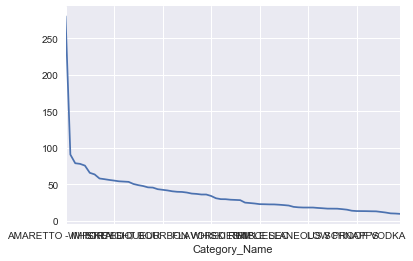

In [239]:
liquor_2015.groupby('Category_Name').Profit.mean().sort_values(ascending=False).plot()

In [240]:
Q1_sales = liquor_2015Q1.Bottles_Sold.sum() #Sales rose from Q1 to Q2
Q2_sales = liquor_2015Q2.Bottles_Sold.sum() #Sales dropped from Q2 to Q3
Q3_sales = liquor_2015Q3.Bottles_Sold.sum() #Sales rose from Q3 to Q4
Q4_sales = liquor_2015Q4.Bottles_Sold.sum()
Q1_sales, Q2_sales, Q3_sales, Q4_sales

(474565, 559819, 529464, 611262)

In [241]:
print liquor_2015Q1.sum().Profit  #Profit rose from Q1 to Q2
print liquor_2015Q2.sum().Profit  #Profit dropped from Q2 to Q3
print liquor_2015Q3.sum().Profit  #Profit rose from Q3 to Q4
print liquor_2015Q4.sum().Profit 

2058907.65
2447368.38
2246422.34
2787461.01


In [242]:
print liquor_2015Q1.sum().Profit / Q1_sales #Profit per bottle rose from Q1 to Q2
print liquor_2015Q2.sum().Profit / Q2_sales #Profit per bottle dropped from Q2 to Q3
print liquor_2015Q3.sum().Profit / Q3_sales #Profit per bottle rose from Q3 to Q4
print liquor_2015Q4.sum().Profit / Q4_sales

4.33851558796
4.37171367889
4.24282357252
4.56017388616


In [153]:
# number of stores per county

In [154]:
#added. Seems to be strongly correlated

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [155]:
# number of stores per county seems to be highly correlated with sales per county

In [244]:
Q1counties = pd.concat([Q1stores_by_county, Q1sales_by_county], axis=1)

In [245]:
Q2counties = pd.concat([Q2stores_by_county, Q2sales_by_county], axis=1)

In [246]:
Q3counties = pd.concat([Q3stores_by_county, Q3sales_by_county], axis=1)

In [247]:
Q4counties = pd.concat([Q4stores_by_county, Q4sales_by_county], axis=1)

In [254]:
Q1counties.loc[:'Polk']

,Store_Number,Bottles_Sold
County,,
Adair,111,1075
Adams,43,174
Allamakee,137,1135
Appanoose,181,1317
Audubon,61,435
Benton,192,1220
Black Hawk,2677,29680
Boone,392,3542
Bremer,440,3098


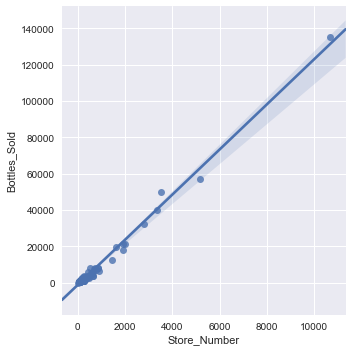

In [249]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "Store_Number", y = 'Bottles_Sold', data = Q4counties ) #pretty dang linear 
#problem: store numbers were counted multiple times. Polk county had around 200 stores, but around 9000 transactions.
#the double-counting doesn't matter, as I will show later.
#the reason it doesn't matter, in a nutshell for now is because we double-counted everything equally. 
#no stores were not double-counted. We've essentially just changed the scale.

In [251]:
def lin_reg(x,y):
    import scipy.stats
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    beta_0 = np.mean(y)-(beta_1*np.mean(x))
    print 'The optimal y-intercept is ', beta_0
    print 'The optimal slope is ', beta_1
    

lin_reg(Q1counties['Store_Number'], Q1counties['Bottles_Sold'])

#this suggests that if there were zero liquors stores in the county, the county would sell -1243.31 bottles. 
#the line is being strongly affected by the biggest county in the sample

The optimal y-intercept is  -820.514084165
The optimal slope is  11.1662391594


In [169]:
#let's try this again with stats models:
import statsmodels.api as sm

#setting X and y for modelling
X = Q1counties["Store_Number"]
y = Q1counties["Bottles_Sold"]
X = sm.add_constant(X)

#fit our model
model = sm.OLS(y,X).fit()

#and generate predicted values using the model we just fit
y_pred = model.predict(X)

In [170]:
y_pred[:5] #what I just did

array([  418.93846253,  -340.36580031,   709.26068067,  1200.57520369,
        -139.37349544])

In [171]:
#Now lets plot the residual comparing the model to the true data points

In [173]:
Q1counties['y_pred'] = y_pred
Q1counties['Residuals'] = Q1counties["Bottles_Sold"] - Q1counties["y_pred"]

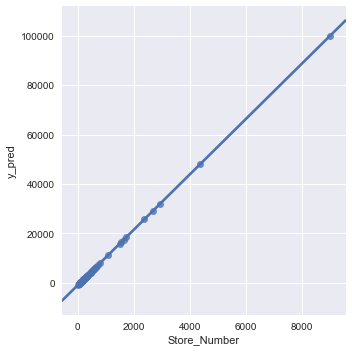

In [175]:
sns.lmplot(x = 'Store_Number', y = 'y_pred', data = Q1counties) #pretty dang straight

In [159]:
#do the residual errors follow a normal distribution?

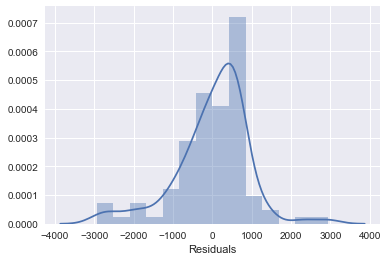

In [176]:
sns.distplot(Q1counties['Residuals']) #the errors are skewed left, but tend towards normality

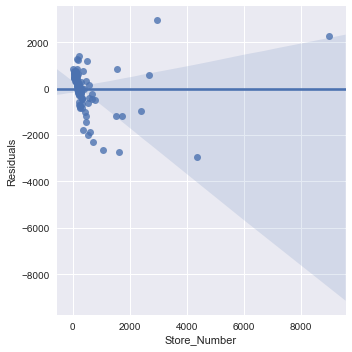

In [177]:
sns.lmplot(x = 'Store_Number', y= 'Residuals', data = Q1counties) #Equality of variance? 
#the outlier counties are messing things up, but most of the data is pretty equal

In [178]:
model.summary() #incredible correlation. Tell me how many stores you have, I'll tell you how many sales you'll have.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Bottles_Sold   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          1.18e-109
Time:                        09:10:54   Log-Likelihood:                -817.79
No. Observations:                  99   AIC:                             1640.
Df Residuals:                      97   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const         -820.5141    104.808     -7.829      0.000     -1028.528  -612.500
Store_Number    11.1662      0.088    127.005      0.000        10.992    11.341
==============================================================================
Omnibus:                       15.121   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.308
Skew:                          -0.674   Prob(JB):                     8.68e-06
Kurtosis:                       4.958   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [163]:
#train-test-split-time

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train) #fit the model
predictions = lr.predict(X_test) #predictions will be based on the X_test
lr.score(X_test, y_test) #amazing fit

0.99439148104735708

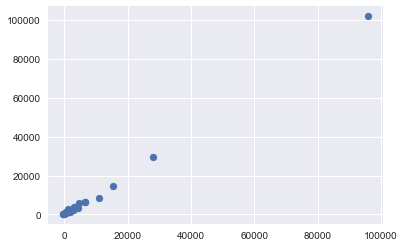

In [165]:
plt.scatter(predictions, y_test)

In [683]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, Q1counties['Store_Number'], Q1counties['Bottles_Sold'], cv=5)

ValueError: All the n_groups for individual classes are less than n_splits=5.

In [166]:
print sum(Q1counties["Store_Number"])
print sum(Q2counties["Store_Number"])
print sum(Q3counties["Store_Number"])
print sum(Q4counties["Store_Number"])
#49759 / 58271  = 1.17
#liquor stores increased 17% from end of Q1 to end of Q4, 2015.
#while we don't know exactly how much they will increasein 2016, assuming little change, let's estimate 15%.
print
print sum(stores_by_county_2016)*1.15
#By the end of 2016, we'll expect roughly 59,111 stores.

49759
55393
55054
58271

59111.15


In [167]:
print sum(Q1counties["Bottles_Sold"])
print sum(Q2counties["Bottles_Sold"])
print sum(Q3counties["Bottles_Sold"])
print sum(Q4counties["Bottles_Sold"])
#Bottles sold
# 49759 / 474390 = .105
# 55393 / 559583 = .098
# 55054 / 529298 = .104
# 58271 / 611170 = .095
print
print 59111.15/.10
#based off Q1 2016's reduction in liquor stores, it looks like Iowa will sell about 591,111.50 bottles of liquor across the entire state by end of 2016.

474390
559583
529298
611170

591111.5


# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [107]:
# Plots included above

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [259]:
#Proving that the double-counting of stores doesn't matter:

In [335]:
proof_stores = liquor_2015Q1.groupby('County').Store_Number.nunique()

In [327]:
proof_bottles = liquor_2015Q1.groupby('County').Bottles_Sold.sum()

In [328]:
proof_df = pd.concat([proof_stores, proof_bottles], axis=1)

In [329]:
proof_df.head()

,Store_Number,Bottles_Sold
County,,
Adair,8,1075
Adams,1,174
Allamakee,6,1135
Appanoose,6,1317
Audubon,2,435


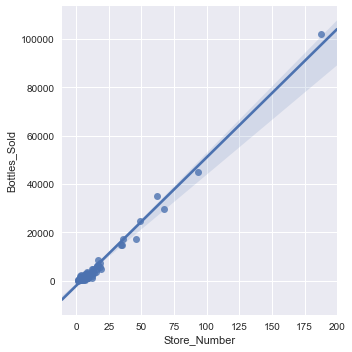

In [330]:
sns.lmplot(x = "Store_Number", y = 'Bottles_Sold', data = proof_df )

In [331]:
#Prroof

In [332]:
#now for the final piece of the puzzle. How can we predict the number of stores?

In [579]:
Q4_stores = liquor_2015Q4.groupby('County').Store_Number.nunique()

In [580]:
Q4_proofstores.index.rename("Q4_Store_Number", inplace=True)

In [581]:
Q1_stores = liquor_2015Q1.groupby('County').Store_Number.nunique()

In [582]:
store_predictor = pd.concat([Q1_stores, Q4_stores], axis=1)

In [583]:
store_predictor.columns =['Q1_Store_Number', 'Q4_Store_Number']

In [585]:
store_predictor["change_in_stores"] = store_predictor['Q4_Store_Number'] - store_predictor['Q1_Store_Number']

In [586]:
store_predictor.head()

,Q1_Store_Number,Q4_Store_Number,change_in_stores
County,,,
Adair,8,7,-1
Adams,1,1,0
Allamakee,6,6,0
Appanoose,6,6,0
Audubon,2,2,0


In [587]:
store_predictor.head()

,Q1_Store_Number,Q4_Store_Number,change_in_stores
County,,,
Adair,8,7,-1
Adams,1,1,0
Allamakee,6,6,0
Appanoose,6,6,0
Audubon,2,2,0


In [588]:
Q4_profit2015 = liquor_2015Q4.groupby('County').Profit.sum()

In [589]:
Q1_profit2015 = liquor_2015Q1.groupby('County').Profit.sum()

In [590]:
Q4_Bottles = liquor_2015Q4.groupby('County').Bottles_Sold.sum()

In [591]:
Q1_Bottles = liquor_2015Q1.groupby('County').Bottles_Sold.sum()

In [625]:
store_predictor.head()

,Q1_Store_Number,Q4_Store_Number,change_in_stores,2015Q1_profit,2015Q4_profit,change_in_profit,change_in_bottles,Q1_Bottles,Q4_Bottles
County,,,,,,,,,
Adair,8,7,-1,3411.38,3592.96,181.58,-185,1075,890
Adams,1,1,0,751.31,824.17,72.86,3,174,177
Allamakee,6,6,0,5011.35,7330.65,2319.30,450,1135,1585
Appanoose,6,6,0,5089.05,5463.18,374.13,137,1317,1454
Audubon,2,2,0,1869.15,1634.39,-234.76,-25,435,410


In [623]:
store_predictor['Q1_Bottles'] = Q1_Bottles

In [624]:
store_predictor['Q4_Bottles'] = Q4_Bottles

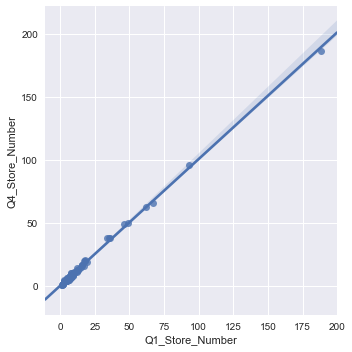

In [632]:
sns.lmplot(x = "Q1_Store_Number", y = 'Q4_Store_Number', data = store_predictor)

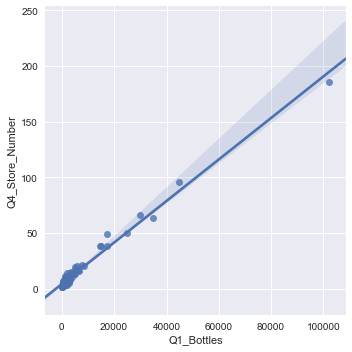

In [633]:
sns.lmplot(x = "Q1_Bottles", y = 'Q4_Store_Number', data = store_predictor)

In [650]:
def lin_reg(x,y):
    import scipy.stats
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    beta_0 = np.mean(y)-(beta_1*np.mean(x))
    print 'The optimal y-intercept is ', beta_0
    print 'The optimal slope is ', beta_1
    

lin_reg(store_predictor['Q1_Store_Number'], store_predictor['Q4_Store_Number'])


The optimal y-intercept is  0.293854393703
The optimal slope is  1.00389247821


In [674]:
liquor_2016.groupby('County').Store_Number.nunique().sum()

1280

In [651]:
Q42016_stores =(1280* 1.00389247821)+0.293854393703

In [670]:
Q42016_stores

1285.276226502503

In [655]:
def lin_reg(x,y):
    import scipy.stats
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    beta_0 = np.mean(y)-(beta_1*np.mean(x))
    print 'The optimal y-intercept is ', beta_0
    print 'The optimal slope is ', beta_1
    

lin_reg(store_predictor['Q1_Store_Number'], store_predictor['Q1_Bottles'])


The optimal y-intercept is  -1962.37062153
The optimal slope is  530.265417551


In [663]:
bottles2016beg = (1280 * 530.265417551) + -1962.37062153

In [658]:
bottles2016end = (1285.276226502503 * 530.265417551) + -1962.37062153

In [659]:
bottles2016end

679575.1642931935

In [662]:
bottles2016beg

676777.3638437501

In [664]:
avg = (bottles2016beg + bottles2016end) / 2

In [666]:
Q2and3 = avg*2

In [667]:
sale2016 = bottles2016beg + Q2and3 + bottles2016end

In [668]:
sale2016

2712705.056273887

In [ ]:
# # EXECUTIVE SUMMARY:
# To discover what variable might be a good indicator of liquor sales in Iowa.
# I performed exploratory analysis, which gave me a lead for what I thought was a solid hypothesis. 
# I tested my hypothesis with linear regression and found a strong positive correlation between stores per county and sales per county.
# To then predict where stores will be at end of 2016, I performed another simple linear regression.
# I found specific numbers, that I feel reasonably confident would be in the ballpark for both stores and sales in 2016.